In [467]:
import pandas as pd
import numpy as np

import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [468]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

data_path = "data/predicting-sales-quantity-in-our-dynamic-gridworld"

In [469]:
train = pd.read_csv(f"{data_path}/train.csv")
test = pd.read_csv(f"{data_path}/test.csv")
sup = pd.read_csv(f"{data_path}/supplemental_cities.csv")

train = pd.merge(train, sup, on="city_id")
test = pd.merge(test, sup, on="city_id")

In [470]:
train["type"] = 0
test["type"] = 1
all_data = pd.concat([train, test], axis=0)

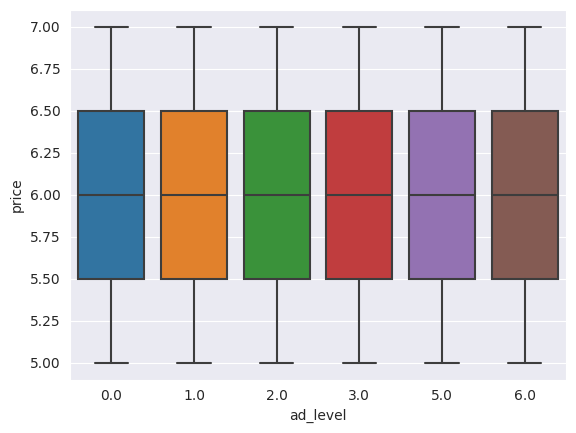

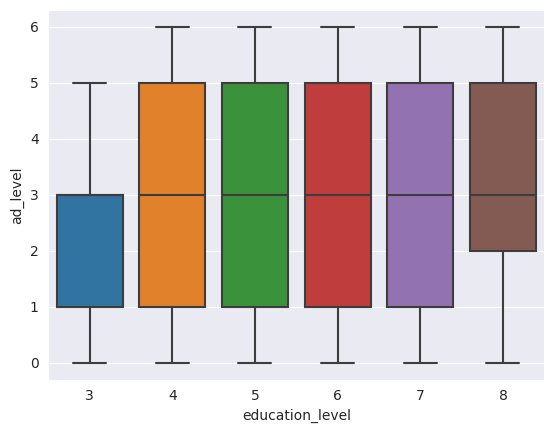

In [471]:
sns.boxplot(y=all_data["price"], x=all_data["ad_level"])
plt.show()
sns.boxplot(y=all_data["ad_level"], x=all_data["education_level"])
plt.show()

In [472]:
all_data["price"].fillna(6.0, inplace=True)
all_data["ad_level"].fillna(3.0, inplace=True)

all_data["population"] = all_data["population"].fillna(train["population"].mean())
all_data["median_income"] = all_data["median_income"].fillna(train["median_income"].mean())

all_data["ad_level"] += 1

In [473]:
all_data["no_stores"] = all_data.groupby("city_id").transform("size")

all_data["x"] = all_data["city_id"].str.split("/").str[0]
all_data["x"] = all_data["x"].astype(int) + 1
all_data["y"] = all_data["city_id"].str.split("/").str[1]
all_data["y"] = all_data['y'].astype(int) + 1
all_data["length"] = (all_data["x"]**2 + all_data["y"]**2)**0.5
all_data["cos"] = all_data["x"] / all_data["length"]
all_data["city_nr"] = all_data["city_id"].str.split("/").str[2]
all_data["city_nr"] = all_data["city_nr"].astype(int)

all_data["education_to_population_ratio"] = all_data["education_level"] / all_data["population"]
all_data["population_education_product"] = all_data["population"] * all_data["education_level"]

all_data["price_ad_interaction"] = all_data["price"] * all_data["ad_level"]
all_data["price_population_interaction"] = all_data["price"] * all_data["population"]
all_data["price_education_interaction"] = all_data["price"] * all_data["education_level"]
all_data["price_income_interaction"] = all_data["price"] * all_data["median_income"]

all_data["mean_price_ad_interaction"] = all_data.groupby("city_id")["price_ad_interaction"].transform("mean")
all_data["mean_price_population_interaction"] = all_data.groupby("city_id")["price_population_interaction"].transform("mean")
all_data["mean_price_education_interaction"] = all_data.groupby("city_id")["price_education_interaction"].transform("mean")
all_data["mean_price_income_interaction"] = all_data.groupby("city_id")["price_income_interaction"].transform("mean")

all_data["mean_price"] = all_data.groupby("city_id")["price"].transform("mean")
all_data["mean_ad_level"] = all_data.groupby("city_id")["ad_level"].transform("mean")
all_data["mean_quantity"] = all_data.groupby("city_id")["quantity"].transform("mean")

In [474]:
X_data = all_data.copy()
X_data.drop_duplicates("city_id", inplace=True)
test_cities = X_data[X_data["type"] == 1][["city_id"]]
X_data

,id,city_id,price,store_id,quantity,ad_level,population,education_level,median_income,type,no_stores,x,y,length,cos,city_nr,education_to_population_ratio,population_education_product,price_ad_interaction,price_population_interaction,price_education_interaction,price_income_interaction,mean_price_ad_interaction,mean_price_population_interaction,mean_price_education_interaction,mean_price_income_interaction,mean_price,mean_ad_level,mean_quantity
0,0,0/0/0,6.00,0,2240.0,7.0,9868.0,5,1478.732661,0,1,1,1,1.414214,0.707107,0,0.000507,49340.0,42.00,59208.00,30.00,8872.395966,42.00,59208.00,30.000,8872.395966,6.000,7.0,2240.0
1,3,0/4/0,6.00,0,2558.0,4.0,7446.0,6,1612.926622,0,1,1,5,5.099020,0.196116,0,0.000806,44676.0,24.00,44676.00,36.00,9677.559731,24.00,44676.00,36.000,9677.559731,6.000,4.0,2558.0
2,11,0/9/1,5.25,0,2316.0,3.0,2029.0,5,1403.120891,0,1,1,10,10.049876,0.099504,1,0.002464,10145.0,15.75,10652.25,26.25,7366.384678,15.75,10652.25,26.250,7366.384678,5.250,3.0,2316.0
3,14,0/11/0,6.25,0,2276.0,6.0,4418.0,6,1555.556995,0,1,1,12,12.041595,0.083045,0,0.001358,26508.0,37.50,27612.50,37.50,9722.231216,37.50,27612.50,37.500,9722.231216,6.250,6.0,2276.0
4,15,0/13/0,6.00,0,1800.0,3.0,3932.0,5,1431.114759,0,1,1,14,14.035669,0.071247,0,0.001272,19660.0,18.00,23592.00,30.00,8586.688555,18.00,23592.00,30.000,8586.688555,6.000,3.0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14386,36046,149/139/0,5.25,0,NaN,7.0,2706.0,6,1594.663641,1,1,150,140,205.182845,0.731055,0,0.002217,16236.0,36.75,14206.50,31.50,8371.984116,36.75,14206.50,31.500,8371.984116,5.250,7.0,NaN
14387,36047,149/141/0,7.00,0,NaN,3.0,2191.0,6,1434.542613,1,1,150,142,206.552657,0.726207,0,0.002738,13146.0,21.00,15337.00,42.00,10041.798294,21.00,15337.00,42.000,10041.798294,7.000,3.0,NaN
14388,36048,149/142/0,5.25,0,NaN,1.0,3533.0,6,1949.245987,1,1,150,143,207.241405,0.723794,0,0.001698,21198.0,5.25,18548.25,31.50,10233.541432,5.25,18548.25,31.500,10233.541432,5.250,1.0,NaN
14389,36053,149/145/1,6.00,0,NaN,7.0,36085.0,6,1956.846461,1,1,150,146,209.322717,0.716597,1,0.000166,216510.0,42.00,216510.00,36.00,11741.078767,42.00,216510.00,36.000,11741.078767,6.000,7.0,NaN


In [475]:
X_data.drop(columns=["id", "city_id", "store_id", "ad_level", "price", "quantity", "price_ad_interaction", "price_population_interaction", "price_education_interaction", "price_income_interaction"], inplace=True)
X_data

,population,education_level,median_income,type,no_stores,x,y,length,cos,city_nr,education_to_population_ratio,population_education_product,mean_price_ad_interaction,mean_price_population_interaction,mean_price_education_interaction,mean_price_income_interaction,mean_price,mean_ad_level,mean_quantity
0,9868.0,5,1478.732661,0,1,1,1,1.414214,0.707107,0,0.000507,49340.0,42.00,59208.00,30.000,8872.395966,6.000,7.0,2240.0
1,7446.0,6,1612.926622,0,1,1,5,5.099020,0.196116,0,0.000806,44676.0,24.00,44676.00,36.000,9677.559731,6.000,4.0,2558.0
2,2029.0,5,1403.120891,0,1,1,10,10.049876,0.099504,1,0.002464,10145.0,15.75,10652.25,26.250,7366.384678,5.250,3.0,2316.0
3,4418.0,6,1555.556995,0,1,1,12,12.041595,0.083045,0,0.001358,26508.0,37.50,27612.50,37.500,9722.231216,6.250,6.0,2276.0
4,3932.0,5,1431.114759,0,1,1,14,14.035669,0.071247,0,0.001272,19660.0,18.00,23592.00,30.000,8586.688555,6.000,3.0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14386,2706.0,6,1594.663641,1,1,150,140,205.182845,0.731055,0,0.002217,16236.0,36.75,14206.50,31.500,8371.984116,5.250,7.0,NaN
14387,2191.0,6,1434.542613,1,1,150,142,206.552657,0.726207,0,0.002738,13146.0,21.00,15337.00,42.000,10041.798294,7.000,3.0,NaN
14388,3533.0,6,1949.245987,1,1,150,143,207.241405,0.723794,0,0.001698,21198.0,5.25,18548.25,31.500,10233.541432,5.250,1.0,NaN
14389,36085.0,6,1956.846461,1,1,150,146,209.322717,0.716597,1,0.000166,216510.0,42.00,216510.00,36.000,11741.078767,6.000,7.0,NaN


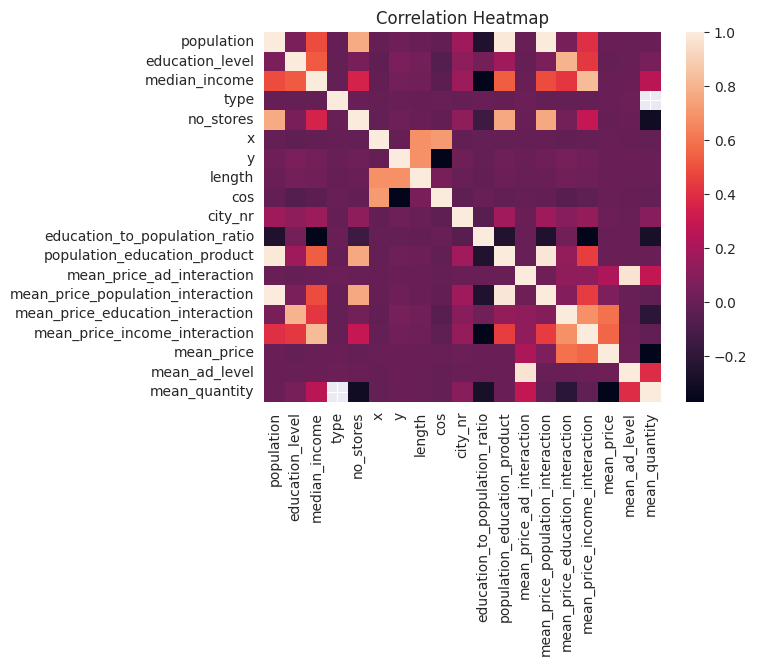

In [476]:
sns.heatmap(X_data.corr(numeric_only=True), robust= True)
plt.title("Correlation Heatmap")
plt.show()

In [477]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [478]:
mean_quantity_df = X_data[["mean_quantity"]]
X_data.drop(columns="mean_quantity", inplace=True)

In [479]:
scaler = MinMaxScaler((0, 1))

X_data[X_data.columns] = scaler.fit_transform(X_data)
mean_quantity_df = scaler.fit_transform(mean_quantity_df)

In [480]:
X_data["mean_quantity"] = mean_quantity_df

In [481]:
train = X_data[X_data.type == 0]
train = train.drop(columns=["type"])
train.reset_index(inplace=True, drop=True)
test = X_data[X_data.type == 1]
test = test.drop(columns=["type", "mean_quantity"])
test.reset_index(inplace=True,drop=True)

In [482]:
y = train[["mean_quantity"]]
X = train.drop(columns="mean_quantity")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [483]:
from keras import Sequential, layers

In [405]:
model = Sequential()
model.add(layers.Dense(24, activation="relu", input_shape=(X.shape[-1],)))
model.add(layers.Dense(12, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
# model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="linear"))

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=240, batch_size=64, verbose=2, validation_split=0.15)

Epoch 1/240
151/151 - 1s - loss: 0.0125 - val_loss: 0.0098 - 955ms/epoch - 6ms/step
Epoch 2/240
151/151 - 0s - loss: 0.0085 - val_loss: 0.0077 - 156ms/epoch - 1ms/step
Epoch 3/240
151/151 - 0s - loss: 0.0068 - val_loss: 0.0063 - 164ms/epoch - 1ms/step
Epoch 4/240
151/151 - 0s - loss: 0.0055 - val_loss: 0.0049 - 156ms/epoch - 1ms/step
Epoch 5/240
151/151 - 0s - loss: 0.0045 - val_loss: 0.0043 - 159ms/epoch - 1ms/step
Epoch 6/240
151/151 - 0s - loss: 0.0040 - val_loss: 0.0042 - 174ms/epoch - 1ms/step
Epoch 7/240
151/151 - 0s - loss: 0.0039 - val_loss: 0.0038 - 169ms/epoch - 1ms/step
Epoch 8/240
151/151 - 0s - loss: 0.0037 - val_loss: 0.0042 - 166ms/epoch - 1ms/step
Epoch 9/240
151/151 - 0s - loss: 0.0036 - val_loss: 0.0037 - 164ms/epoch - 1ms/step
Epoch 10/240
151/151 - 0s - loss: 0.0035 - val_loss: 0.0038 - 157ms/epoch - 1ms/step
Epoch 11/240


KeyboardInterrupt: 

In [269]:
y_test_predict = scaler.inverse_transform(model.predict(X_test))
y_test_true = scaler.inverse_transform(y_test)
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test_true, y_test_predict))}")

40/40 [==============================] - 0s 840us/step
Mean Squared Error: 286.24718697467796


In [484]:
model = Sequential()
model.add(layers.Dense(24, activation="relu", input_shape=(X.shape[-1],)))
model.add(layers.Dense(12, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
# model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="linear"))

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X, y, epochs=240, batch_size=64, verbose=2, validation_split=0.15)

Epoch 1/240
168/168 - 1s - loss: 0.0165 - val_loss: 0.0099 - 1s/epoch - 8ms/step
Epoch 2/240
168/168 - 0s - loss: 0.0083 - val_loss: 0.0066 - 182ms/epoch - 1ms/step
Epoch 3/240
168/168 - 0s - loss: 0.0054 - val_loss: 0.0051 - 175ms/epoch - 1ms/step
Epoch 4/240
168/168 - 0s - loss: 0.0045 - val_loss: 0.0042 - 170ms/epoch - 1ms/step
Epoch 5/240
168/168 - 0s - loss: 0.0040 - val_loss: 0.0042 - 179ms/epoch - 1ms/step
Epoch 6/240
168/168 - 0s - loss: 0.0037 - val_loss: 0.0038 - 175ms/epoch - 1ms/step
Epoch 7/240
168/168 - 0s - loss: 0.0036 - val_loss: 0.0035 - 179ms/epoch - 1ms/step
Epoch 8/240
168/168 - 0s - loss: 0.0034 - val_loss: 0.0035 - 177ms/epoch - 1ms/step
Epoch 9/240
168/168 - 0s - loss: 0.0033 - val_loss: 0.0033 - 172ms/epoch - 1ms/step
Epoch 10/240
168/168 - 0s - loss: 0.0032 - val_loss: 0.0035 - 175ms/epoch - 1ms/step
Epoch 11/240
168/168 - 0s - loss: 0.0032 - val_loss: 0.0032 - 172ms/epoch - 1ms/step
Epoch 12/240
168/168 - 0s - loss: 0.0031 - val_loss: 0.0031 - 172ms/epoch - 1

In [485]:
test_predict = scaler.inverse_transform(model.predict(test))
test_cities["mean_quantity"] = test_predict

263/263 [==============================] - 0s 2ms/step


In [487]:
all_data = all_data.merge(test_cities, on="city_id", how="left")
all_data

,id,city_id,price,store_id,quantity,ad_level,population,education_level,median_income,type,no_stores,x,y,length,cos,city_nr,education_to_population_ratio,population_education_product,price_ad_interaction,price_population_interaction,price_education_interaction,price_income_interaction,mean_price_ad_interaction,mean_price_population_interaction,mean_price_education_interaction,mean_price_income_interaction,mean_price,mean_ad_level,mean_quantity_x,mean_quantity_y
0,0,0/0/0,6.00,0,2240.0,7.0,9868.0,5,1478.732661,0,1,1,1,1.414214,0.707107,0,0.000507,49340.0,42.00,59208.00,30.00,8872.395966,42.00,59208.00,30.000,8872.395966,6.000,7.0,2240.0,NaN
1,3,0/4/0,6.00,0,2558.0,4.0,7446.0,6,1612.926622,0,1,1,5,5.099020,0.196116,0,0.000806,44676.0,24.00,44676.00,36.00,9677.559731,24.00,44676.00,36.000,9677.559731,6.000,4.0,2558.0,NaN
2,11,0/9/1,5.25,0,2316.0,3.0,2029.0,5,1403.120891,0,1,1,10,10.049876,0.099504,1,0.002464,10145.0,15.75,10652.25,26.25,7366.384678,15.75,10652.25,26.250,7366.384678,5.250,3.0,2316.0,NaN
3,14,0/11/0,6.25,0,2276.0,6.0,4418.0,6,1555.556995,0,1,1,12,12.041595,0.083045,0,0.001358,26508.0,37.50,27612.50,37.50,9722.231216,37.50,27612.50,37.500,9722.231216,6.250,6.0,2276.0,NaN
4,15,0/13/0,6.00,0,1800.0,3.0,3932.0,5,1431.114759,0,1,1,14,14.035669,0.071247,0,0.001272,19660.0,18.00,23592.00,30.00,8586.688555,18.00,23592.00,30.000,8586.688555,6.000,3.0,1800.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36054,36047,149/141/0,7.00,0,NaN,3.0,2191.0,6,1434.542613,1,1,150,142,206.552657,0.726207,0,0.002738,13146.0,21.00,15337.00,42.00,10041.798294,21.00,15337.00,42.000,10041.798294,7.000,3.0,NaN,973.617737
36055,36048,149/142/0,5.25,0,NaN,1.0,3533.0,6,1949.245987,1,1,150,143,207.241405,0.723794,0,0.001698,21198.0,5.25,18548.25,31.50,10233.541432,5.25,18548.25,31.500,10233.541432,5.250,1.0,NaN,1770.545044
36056,36053,149/145/1,6.00,0,NaN,7.0,36085.0,6,1956.846461,1,1,150,146,209.322717,0.716597,1,0.000166,216510.0,42.00,216510.00,36.00,11741.078767,42.00,216510.00,36.000,11741.078767,6.000,7.0,NaN,4080.214355
36057,36057,149/149/0,5.00,0,NaN,4.0,12700.0,5,1538.651385,1,2,150,150,212.132034,0.707107,0,0.000394,63500.0,20.00,63500.00,25.00,7693.256923,28.75,71437.50,28.125,8654.914038,5.625,5.0,NaN,2679.703857


In [488]:
all_data.isna().sum()

id                                       0
city_id                                  0
price                                    0
store_id                                 0
quantity                             14392
ad_level                                 0
population                               0
education_level                          0
median_income                            0
type                                     0
no_stores                                0
x                                        0
y                                        0
length                                   0
cos                                      0
city_nr                                  0
education_to_population_ratio            0
population_education_product             0
price_ad_interaction                     0
price_population_interaction             0
price_education_interaction              0
price_income_interaction                 0
mean_price_ad_interaction                0
mean_price_

In [489]:
all_data.loc[all_data["mean_quantity_x"].isna(), "mean_quantity_x"] = all_data[~all_data["mean_quantity_y"].isna()]["mean_quantity_y"]
all_data.drop(columns="mean_quantity_y", inplace=True)

In [490]:
columns = [
    "id",
    "city_id",
    "store_id",
    "price",
    "ad_level",
    "quantity",
    "type",
    "no_stores",
    "city_nr",
    "mean_quantity_x"
]
X_data = all_data[columns].copy()

In [491]:
X_data

,id,city_id,store_id,price,ad_level,quantity,type,no_stores,city_nr,mean_quantity_x
0,0,0/0/0,0,6.00,7.0,2240.0,0,1,0,2240.000000
1,3,0/4/0,0,6.00,4.0,2558.0,0,1,0,2558.000000
2,11,0/9/1,0,5.25,3.0,2316.0,0,1,1,2316.000000
3,14,0/11/0,0,6.25,6.0,2276.0,0,1,0,2276.000000
4,15,0/13/0,0,6.00,3.0,1800.0,0,1,0,1800.000000
...,...,...,...,...,...,...,...,...,...,...
36054,36047,149/141/0,0,7.00,3.0,NaN,1,1,0,973.617737
36055,36048,149/142/0,0,5.25,1.0,NaN,1,1,0,1770.545044
36056,36053,149/145/1,0,6.00,7.0,NaN,1,1,1,4080.214355
36057,36057,149/149/0,0,5.00,4.0,NaN,1,2,0,2679.703857


In [492]:
X_data.loc[:, "price"] /= X_data.groupby("city_id")["price"].transform("max")
X_data.loc[:, "ad_level"] /= X_data.groupby("city_id")["ad_level"].transform("max")
X_data.loc[:, "quantity"] /= X_data["mean_quantity_x"]

X_data.loc[:, "no_stores"] /= X_data["no_stores"].max()
X_data.loc[:, "city_nr"] /= X_data["city_nr"].max()

In [493]:
X_data

,id,city_id,store_id,price,ad_level,quantity,type,no_stores,city_nr,mean_quantity_x
0,0,0/0/0,0,1.0,1.000000,1.0,0,0.033333,0.0,2240.000000
1,3,0/4/0,0,1.0,1.000000,1.0,0,0.033333,0.0,2558.000000
2,11,0/9/1,0,1.0,1.000000,1.0,0,0.033333,0.5,2316.000000
3,14,0/11/0,0,1.0,1.000000,1.0,0,0.033333,0.0,2276.000000
4,15,0/13/0,0,1.0,1.000000,1.0,0,0.033333,0.0,1800.000000
...,...,...,...,...,...,...,...,...,...,...
36054,36047,149/141/0,0,1.0,1.000000,NaN,1,0.033333,0.0,973.617737
36055,36048,149/142/0,0,1.0,1.000000,NaN,1,0.033333,0.0,1770.545044
36056,36053,149/145/1,0,1.0,1.000000,NaN,1,0.033333,0.5,4080.214355
36057,36057,149/149/0,0,0.8,0.666667,NaN,1,0.066667,0.0,2679.703857


In [494]:
for c, suff in zip(["ad_level", "price", "quantity", "id"], [("", ""), ("_a", "_p"), ("", ""), ("_q", "_id")]):
    pivot_df = X_data.pivot(index="city_id", columns="store_id", values=[c])
    if c != "id":
        pivot_df.fillna(0, inplace=True)
    X_data = X_data.merge(pivot_df[c], on="city_id", how="left", suffixes=suff)

mean_quantity_df = X_data[["id", "mean_quantity_x"]]
X_data.drop_duplicates("city_id", inplace=True)

ids = [f"{i}_id" for i in range(30)]
test_ids = X_data[X_data["type"] == 1][ids].values

X_data.drop(columns=["id", "city_id", "store_id", "ad_level", "price", "quantity", *ids], inplace=True)

In [495]:
X_data

,type,no_stores,city_nr,mean_quantity_x,0_a,1_a,2_a,3_a,4_a,5_a,6_a,7_a,8_a,9_a,10_a,11_a,12_a,13_a,14_a,15_a,16_a,17_a,18_a,19_a,20_a,21_a,22_a,23_a,24_a,25_a,26_a,27_a,28_a,29_a,0_p,1_p,2_p,3_p,4_p,5_p,6_p,7_p,8_p,9_p,10_p,11_p,12_p,13_p,14_p,15_p,16_p,17_p,18_p,19_p,20_p,21_p,22_p,23_p,24_p,25_p,26_p,27_p,28_p,29_p,0_q,1_q,2_q,3_q,4_q,5_q,6_q,7_q,8_q,9_q,10_q,11_q,12_q,13_q,14_q,15_q,16_q,17_q,18_q,19_q,20_q,21_q,22_q,23_q,24_q,25_q,26_q,27_q,28_q,29_q
0,0,0.033333,0.0,2240.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.033333,0.0,2558.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.033333,0.5,2316.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.033333,0.0,2276.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.033333,0.0,1800.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36053,1,0.033333,0.0,2873.518799,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36054,1,0.033333,0.0,973.617737,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36055,1,0.033333,0.0,1770.545044,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [496]:
X_data.sort_values("no_stores", ascending=False)

,type,no_stores,city_nr,mean_quantity_x,0_a,1_a,2_a,3_a,4_a,5_a,6_a,7_a,8_a,9_a,10_a,11_a,12_a,13_a,14_a,15_a,16_a,17_a,18_a,19_a,20_a,21_a,22_a,23_a,24_a,25_a,26_a,27_a,28_a,29_a,0_p,1_p,2_p,3_p,4_p,5_p,6_p,7_p,8_p,9_p,10_p,11_p,12_p,13_p,14_p,15_p,16_p,17_p,18_p,19_p,20_p,21_p,22_p,23_p,24_p,25_p,26_p,27_p,28_p,29_p,0_q,1_q,2_q,3_q,4_q,5_q,6_q,7_q,8_q,9_q,10_q,11_q,12_q,13_q,14_q,15_q,16_q,17_q,18_q,19_q,20_q,21_q,22_q,23_q,24_q,25_q,26_q,27_q,28_q,29_q
28890,1,1.000000,0.5,566.454041,1.000000,0.571429,0.428571,0.571429,0.142857,1.000000,0.285714,1.000000,0.857143,0.571429,0.571429,0.571429,0.571429,0.285714,0.571429,0.142857,0.571429,0.571429,0.571429,0.428571,0.428571,1.000000,0.142857,0.571429,0.285714,0.285714,0.571429,0.571429,0.857143,0.571429,0.785714,0.750000,0.857143,1.000000,0.964286,0.892857,0.714286,1.000000,0.785714,0.821429,0.821429,0.928571,0.821429,0.892857,0.714286,0.964286,0.928571,0.714286,0.857143,0.928571,0.785714,0.857143,0.714286,0.857143,0.785714,0.75,0.928571,0.857143,0.714286,0.892857,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6811,0,0.766667,0.0,741.913043,0.857143,0.571429,1.000000,0.428571,0.571429,0.857143,1.000000,0.571429,0.428571,0.571429,0.285714,0.857143,0.428571,0.857143,0.571429,1.000000,0.857143,1.000000,0.857143,0.285714,0.857143,0.571429,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.821429,0.750000,0.892857,1.000000,0.821429,0.928571,0.821429,0.821429,0.750000,0.928571,1.000000,0.857143,0.892857,0.928571,0.821429,0.857143,0.821429,0.892857,0.714286,1.000000,0.714286,1.000000,0.892857,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,1.121425,1.173992,1.051336,0.703586,1.071554,0.99203,1.142991,1.106599,0.938115,0.94755,0.586322,1.07425,0.788502,0.99203,1.071554,0.938115,1.121425,1.051336,1.289909,0.586322,1.289909,0.90981,1.051336,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22548,1,0.700000,0.5,593.386047,0.428571,0.428571,0.571429,0.142857,0.571429,0.285714,0.571429,0.571429,0.571429,0.285714,0.571429,0.571429,0.571429,0.142857,0.571429,0.571429,1.000000,0.428571,0.571429,1.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.821429,0.785714,0.928571,0.750000,0.964286,0.750000,1.000000,0.785714,0.857143,0.750000,0.714286,0.821429,1.000000,0.750000,0.928571,0.857143,0.857143,0.928571,0.714286,0.714286,0.857143,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27797,1,0.633333,0.0,640.303894,0.571429,0.285714,1.000000,0.428571,0.428571,0.571429,0.142857,0.571429,0.142857,0.857143,0.285714,0.571429,0.571429,0.428571,0.142857,1.000000,0.142857,0.571429,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.785714,0.857143,0.821429,0.750000,0.928571,0.821429,0.821429,0.750000,0.964286,0.785714,0.750000,1.000000,0.714286,0.750000,1.000000,0.857143,0.857143,0.750000,0.928571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25936,1,0.633333,0.5,520.905518,0.285714,0.857143,0.285714,1.000000,0.571429,0.571429,0.142857,0.571429,0.142857,0.571429,0.428571,0.285714,0.142857,0.571429,0.428571,0.571429,0.571429,0.571429,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.821429,0.892857,1.000000,0.714286,0.714286,0.

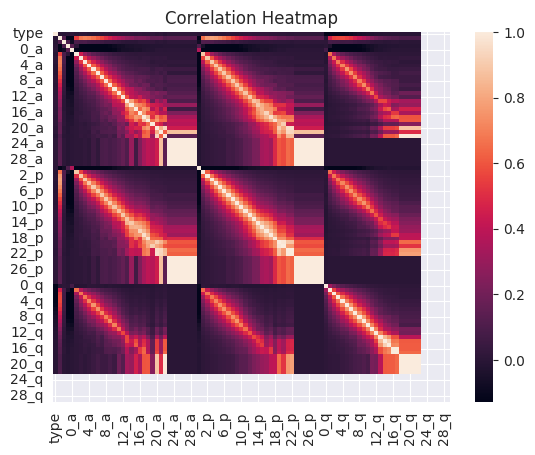

In [497]:
sns.heatmap(X_data.corr(numeric_only=True), robust= True)
plt.title("Correlation Heatmap")
plt.show()

In [498]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor 

In [499]:
train = X_data[X_data.type == 0]
train = train.drop(columns=["type"])
train.reset_index(inplace=True, drop=True)
test = X_data[X_data.type == 1]
test = test.drop(columns=["type"])
test.reset_index(inplace=True,drop=True)

In [500]:
quantity_columns = [f"{i}_q" for i in range(30)]
test.drop(columns=[*quantity_columns, "mean_quantity_x"], inplace=True)
test = test.values

y = train[quantity_columns]
X = train.drop(columns=quantity_columns)

In [501]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.07, random_state=42)
test_len = int(12583*0.15)
X_train = X[test_len:].drop(columns="mean_quantity_x").values
X_test = X[:test_len]
mean_quantity = X_test["mean_quantity_x"].values
X_test = X_test.drop(columns="mean_quantity_x").values

y_train = y[test_len:]
y_test = y[:test_len].values

In [502]:
base_regressor = RandomForestRegressor(
    max_depth=12,
    random_state=42, 
    verbose=1
)
multi_output_regressor = MultiOutputRegressor(base_regressor)
multi_output_regressor.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Do

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=12,
                                                     random_state=42,
                                                     verbose=1))

In [503]:
y_pred = multi_output_regressor.predict(X_test)
for i, q in enumerate(mean_quantity):
    y_pred[i] *= q
    y_test[i] *= q
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

model_index = 17
specific_model = multi_output_regressor.estimators_[model_index]

feature_importance = specific_model.feature_importances_
feature_names = specific_model.feature_names_in_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features for the specific model
N = 10  # You can change N to the number of top features you want to visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:N], feature_importance_df['Importance'][:N])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top {} Most Important Features for Model {}'.format(N, model_index))
plt.gca().invert_yaxis()
plt.show()

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Mean Squared Error: 28.390577705979478


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


AttributeError: 'RandomForestRegressor' object has no attribute 'feature_names_in_'

In [504]:
test_predict = multi_output_regressor.predict(test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

In [513]:
result_df = pd.DataFrame({"id": test_ids.flatten(), "quantity": test_predict.flatten()})
result_df = result_df.dropna()
result_df = result_df.merge(mean_quantity_df, how="left", on="id")
result_df.loc[:, "quantity"] *= result_df["mean_quantity_x"]

result_df.drop(columns="mean_quantity_x", inplace=True)
result_df = result_df.astype(np.int32)
result_df.to_csv("result.csv", index=False)